# Loan Prediction
This notebook is a documentation of the process of predicting the loan taken up for the bank customers. It includes the data transformation and data exploration process.
<br/>

The prediction model can be found in the loan prediction modelling file.
<br>
### Table of Content
1. Import Libraries and Datasets
2. Preliminary Data Exploration
3. Preprocessing Loan Dataset
4. Preprocessing Transaction Dataset
5. Merging transaction and Loan Dataset
6. Extracting Information From Transaction Dataset
7. Functions
8. Creating Final Dataset
9. Data Exploration
10. Exporting Final dataset


# 1. Import libraries and datasets

In [19]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandasql as ps
from datetime import date

# Data exploration
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
loans = pd.read_csv("loan_rev2.csv")
trans = pd.read_csv("trans_rev2.csv")
disp = pd.read_csv("disp_rev2.csv")
client = pd.read_csv("client_rev2.csv")
district = pd.read_csv("district_rev2.csv")

# 2. Preliminary Data Exploration
From our rudimentary data exploration, we find that 1 client will have a unique client id and disp id. There are lesser accounts than clients which shows that there are clients that are sharing the same account. Only owners can issue permanent orders and ask for a loan. As we are predicting loan taken up, we are only concerned with the owners as they are the decision makers of the account. Further data exploration will be available once we have merged the various datasets together.

In [21]:
trans.nunique()

trans_id      1048575
account_id       4500
date             2179
type                3
operation           5
amount          40236
balance        540033
k_symbol            8
bank               13
account          7665
dtype: int64

In [22]:
loans.nunique()

loan_id       682
account_id    682
date          559
amount        645
duration        5
payments      577
status          4
dtype: int64

In [23]:
disp.nunique()

disp_id       5369
client_id     5369
account_id    4500
type             2
dtype: int64

In [24]:
disp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     5369 non-null   int64 
 1   client_id   5369 non-null   int64 
 2   account_id  5369 non-null   int64 
 3   type        5369 non-null   object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB


In [25]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB


# 3. Preprocessing Loan Dataset
The loan dataset does not have the account id and we will have to import it in from the disp table. We will also parse the date into date time format and check if there are clients that have taken up multiple loans. From our analysis, there are no clients that have taken up multiple loans.

In [26]:
loans.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033,B
1,5316,1801,930711,165960,36,4610,A
2,6863,9188,930728,127080,60,2118,A
3,5325,1843,930803,105804,36,2939,A
4,7240,11013,930906,274740,60,4579,A


In [27]:
loans_rev = pd.merge(loans, disp[disp['type']=='OWNER'], on = 'account_id', how='inner')

In [28]:
loans_rev.head(5)

,loan_id,account_id,date,amount,duration,payments,status,disp_id,client_id,type
0,5314,1787,930705,96396,12,8033,B,2166,2166,OWNER
1,5316,1801,930711,165960,36,4610,A,2181,2181,OWNER
2,6863,9188,930728,127080,60,2118,A,11006,11314,OWNER
3,5325,1843,930803,105804,36,2939,A,2235,2235,OWNER
4,7240,11013,930906,274740,60,4579,A,13231,13539,OWNER


In [29]:
type(loans_rev['date'].iloc[0])

numpy.int64

In [30]:
loans_rev['date'] = loans['date'].apply(str)

In [31]:
loans_rev['date'] = pd.to_datetime(loans_rev['date']) 

In [32]:
loans_rev.head(5)

,loan_id,account_id,date,amount,duration,payments,status,disp_id,client_id,type
0,5314,1787,1993-07-05,96396,12,8033,B,2166,2166,OWNER
1,5316,1801,1993-07-11,165960,36,4610,A,2181,2181,OWNER
2,6863,9188,1993-07-28,127080,60,2118,A,11006,11314,OWNER
3,5325,1843,1993-08-03,105804,36,2939,A,2235,2235,OWNER
4,7240,11013,1993-09-06,274740,60,4579,A,13231,13539,OWNER


# 4. Preprocessing Transaction Dataset
The transaction dataset has rich information but requires tedious transformation. From the transaction dataset, we will be parsing the dates and import the disposition details from the disp dataset.

In [33]:
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [34]:
trans.sort_values('date', ascending = False, inplace = True)

In [35]:
trans['date'] = trans['date'].apply(str)

In [36]:
trans_rev = pd.merge(trans, disp, on = "account_id", how = 'inner')

In [37]:
trans_rev["date"] = pd.to_datetime(trans_rev["date"]) 

In [38]:
type(trans_rev['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [39]:
trans_rev.head()

,trans_id,account_id,date,type_x,operation,amount,balance,k_symbol,bank,account,disp_id,client_id,type_y
0,1110008,3789,1998-12-19,VYDAJ,VYBER,11100.0,33684.0,NaN,NaN,NaN,4569,4569,OWNER
1,1109971,3789,1998-12-19,VYBER,VYBER,4900.0,44784.0,NaN,NaN,NaN,4569,4569,OWNER
2,1109980,3789,1998-12-18,VYDAJ,VYBER,2100.0,49684.0,NaN,NaN,NaN,4569,4569,OWNER
3,1109946,3789,1998-12-09,VYDAJ,PREVOD NA UCET,11244.0,51784.0,SIPO,QR,43976020.0,4569,4569,OWNER
4,1109970,3789,1998-12-09,VYBER,VYBER,5790.0,63028.0,NaN,NaN,NaN,4569,4569,OWNER


# 5. Merging Transaction and Loan Dataset
For our loan customers, we want to find out what was their bank balance, average transaction amount and number of transactions made as at their loan date. We will be joining the loan dataset with the transaction dataset on 2 criterias.
<br/>
1. disp_id is the same in transaction and loan dataset
2. loan date is more than or equal to transaction date (loan date is after the transaction date)
<br/>

As the 2nd criteria is a more than or equal to criteria, we are unable to use the pd.merge function and will have to rely on an SQL query.

In [40]:
trans_rev.sort_values('date', ascending = False, inplace = True)

In [41]:
trans_rev.head()

,trans_id,account_id,date,type_x,operation,amount,balance,k_symbol,bank,account,disp_id,client_id,type_y
0,1110008,3789,1998-12-19,VYDAJ,VYBER,11100.0,33684.0,NaN,NaN,NaN,4569,4569,OWNER
8282,897183,3056,1998-12-19,VYDAJ,VYBER,600.0,32856.3,NaN,NaN,NaN,3695,3695,OWNER
6907,1109169,3787,1998-12-19,VYDAJ,VYBER,2600.0,81497.4,NaN,NaN,NaN,4567,4567,OWNER
7319,554045,1886,1998-12-19,VYBER,VYBER,16997.0,49077.9,NaN,NaN,NaN,2288,2288,OWNER
1649,2347317,7745,1998-12-19,PRIJEM,VKLAD,4500.0,25398.7,NaN,NaN,NaN,9274,9582,OWNER


In [42]:
# loan balance is the bank balance as at loan date
sqlcode = '''
SELECT *, AVG(trans_amt) AS avg_trans_amt, COUNT(trans_amt) AS no_trans
FROM (
    SELECT loans_rev.loan_id, loans_rev.account_id, loans_rev.disp_id, loans_rev.client_id, loans_rev.type, 
    loans_rev.date AS date1, loans_rev.amount, loans_rev.duration, loans_rev.payments, 
    loans_rev.status,trans_rev.balance AS bank_balance_at_loan, trans_rev.date AS date2, trans_rev.amount AS trans_amt
    FROM loans_rev
    INNER JOIN trans_rev ON loans_rev.disp_id=trans_rev.disp_id
    WHERE loans_rev.date >= trans_rev.date
    ORDER BY date2 DESC
)
GROUP BY disp_id
'''

bank_balance_at_loan = ps.sqldf(sqlcode,locals())
bank_balance_at_loan.head(5)

,loan_id,account_id,disp_id,client_id,type,date1,amount,duration,payments,status,bank_balance_at_loan,date2,trans_amt,avg_trans_amt,no_trans
0,4959,2,2,2,OWNER,1994-01-05 00:00:00.000000,80952,24,3373,A,20574.6,1994-01-05 00:00:00.000000,7266.0,7941.743636,55
1,4961,19,25,25,OWNER,1996-04-29 00:00:00.000000,30276,12,2523,B,15854.0,1996-04-10 00:00:00.000000,15139.0,5856.300000,80
2,4962,25,31,31,OWNER,1997-12-08 00:00:00.000000,30276,12,2523,A,31457.9,1997-12-08 00:00:00.000000,164.0,12041.507273,165
3,4967,37,45,45,OWNER,1998-10-14 00:00:00.000000,318480,60,5308,D,16367.8,1998-10-12 00:00:00.000000,11200.0,7571.999138,116
4,4968,38,46,46,OWNER,1998-04-19 00:00:00.000000,110736,48,2307,C,37416.7,1998-04-10 00:00:00.000000,231.0,4716.194545,55


# 6. Extracting Information From Transaction Dataset
For our clients, we want to extract the average transaction amount, number of transactions made and the latest bank balance from the transaction dataset.

In [43]:
x = trans_rev[['client_id','amount']].groupby(['client_id']).mean()
y = trans_rev[['client_id','amount']].groupby(['client_id']).count()

In [44]:
trans_latest = trans_rev.drop_duplicates(subset=['client_id'])

In [45]:
trans_latest = pd.merge(trans_latest, x, on = "client_id", how='inner')

In [46]:
trans_latest = pd.merge(trans_latest, y, on = "client_id", how='inner')

In [47]:
trans_latest = trans_latest.rename(columns={'amount_y': 'avg_trans1','amount': 'count_trans1'})
trans_latest.head(5)

,trans_id,account_id,date,type_x,operation,amount_x,balance,k_symbol,bank,account,disp_id,client_id,type_y,avg_trans1,count_trans1
0,1110008,3789,1998-12-19,VYDAJ,VYBER,11100.0,33684.0,NaN,NaN,NaN,4569,4569,OWNER,11157.273510,151
1,897183,3056,1998-12-19,VYDAJ,VYBER,600.0,32856.3,NaN,NaN,NaN,3695,3695,OWNER,1605.732051,312
2,1109169,3787,1998-12-19,VYDAJ,VYBER,2600.0,81497.4,NaN,NaN,NaN,4567,4567,OWNER,7609.514806,412
3,554045,1886,1998-12-19,VYBER,VYBER,16997.0,49077.9,NaN,NaN,NaN,2288,2288,OWNER,9451.807212,208
4,2347317,7745,1998-12-19,PRIJEM,VKLAD,4500.0,25398.7,NaN,NaN,NaN,9274,9582,OWNER,12048.267470,166


# 7. Functions
For our clients, we will be writing a few functions to obtain their gender, birthdate, age and categorize them into various age buckets.

In [48]:
client.head(5)

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [49]:
def gender(x):
    y = str(x)[2:]
    if float(y) > 5000:
        return "Female"
    else:
        return "Male"

In [50]:
def birthdate(x):
    year = str(x)[0:2]
    x = str(x)[2:]    
    if float(x)> 5000:
        x = float(x)-5000
        x = int(x)
        return pd.to_datetime('19' +year + str(x).zfill(4))
    else:
        return pd.to_datetime('19' + year + x)

In [51]:
def age(birthdate):
    today = pd.to_datetime('1999' +'01' +'01')
    one_or_zero = ((today.month, today.day) < (birthdate.month, birthdate.day))
    year_difference = today.year - birthdate.year
    age = year_difference - one_or_zero
    
    return age

In [52]:
def age_categorization(age):
  if age <25:
    return 'YOUTH'
  elif age <36:
    return 'ADULT'
  elif age <61:
    return 'MIDDLE-AGE'
  else:
    return 'SENIOR'

In [53]:
client['gender'] = client['birth_number'].apply(gender)
client['birth_date'] = client['birth_number'].apply(birthdate)
client['age'] = client['birth_date'].apply(age)
client['age_categorization'] = client['age'].apply(age_categorization)

In [54]:
client.head(5)

,client_id,birth_number,district_id,gender,birth_date,age,age_categorization
0,1,706213,18,Female,1970-12-13,28,ADULT
1,2,450204,1,Male,1945-02-04,53,MIDDLE-AGE
2,3,406009,1,Female,1940-10-09,58,MIDDLE-AGE
3,4,561201,5,Male,1956-12-01,42,MIDDLE-AGE
4,5,605703,5,Female,1960-07-03,38,MIDDLE-AGE


# 8. Creating Final Dataset
Now that we have all the required information, we will have to join the datasets into one data table to input into our prediction model. We will also perform formatting to the column headers and orders.

In [55]:
district = district.rename(columns={'A1' : 'district_id','A4':'no_of_inhabitants','A11':'average_salary', 'A12':'unemployment_rate','A14':'no_of_entrepreneurs','A16':'no_of_crime'})

In [56]:
final = pd.merge(trans_latest[["client_id","disp_id","account_id","type_y","balance","avg_trans1","count_trans1"]], client, on = "client_id", how = 'inner')

In [57]:
final = pd.merge(final, bank_balance_at_loan[['loan_id', 'date1', 'amount','duration', 'status','payments','client_id','bank_balance_at_loan','avg_trans_amt','no_trans']], on = 'client_id', how = 'outer')

In [58]:
final = pd.merge(final, district[['district_id', 'average_salary','no_of_inhabitants','unemployment_rate','no_of_entrepreneurs','no_of_crime']], on = 'district_id', how = 'left')

Filtering out disponent clients as they are unable to take up a loan and checking if all loan customers have been accounted for.

In [59]:
final = final[final["type_y"] == 'OWNER']

In [60]:
final['bank_balance_at_loan'].count()

682

Reformatting the order and renaming column names

In [61]:
order = ['client_id','disp_id','account_id','type_y','gender','birth_date','age','age_categorization','district_id','balance','loan_id','date1','amount','bank_balance_at_loan','avg_trans_amt','avg_trans1','no_trans','count_trans1','duration','status','payments','average_salary','no_of_inhabitants','unemployment_rate','no_of_entrepreneurs','no_of_crime']
final = final[order]
final = final.rename(columns={'type_y' : 'type','date1':'date', 'loan_amount' : 'amount'})
final['date'] = pd.to_datetime(final['date'])
final.head(5)

,client_id,disp_id,account_id,type,gender,birth_date,age,age_categorization,district_id,balance,...,no_trans,count_trans1,duration,status,payments,average_salary,no_of_inhabitants,unemployment_rate,no_of_entrepreneurs,no_of_crime
0,4569,4569,3789,OWNER,Female,1971-07-09,27,ADULT,6,33684.0,...,NaN,151,NaN,NaN,NaN,8546,77963,2.95,126,3120
1,3695,3695,3056,OWNER,Male,1934-10-04,64,SENIOR,55,32856.3,...,NaN,312,NaN,NaN,NaN,8743,157042,1.88,111,3894
2,4567,4567,3787,OWNER,Male,1937-02-12,61,SENIOR,70,81497.4,...,NaN,412,NaN,NaN,NaN,10177,285387,6.63,81,10108
3,2288,2288,1886,OWNER,Female,1957-08-23,41,MIDDLE-AGE,32,49077.9,...,17.0,208,36.0,C,4513.0,9272,105058,2.8,118,4505
4,9582,9274,7745,OWNER,Female,1942-04-14,56,MIDDLE-AGE,2,25398.7,...,64.0,166,36.0,C,2154.0,8507,88884,1.67,132,2674


For our loan customers we want the bank balance, average transaction amount and number of transactions made as at or before the loan date. For our non-loan customers, we want their latest bank balance, latest average transaction amount and latest number of transactions made which is as at December 1998

In [62]:
final['bank_balance_at_loan2'] = final['bank_balance_at_loan']
final.loc[final['bank_balance_at_loan2'].isnull(),'bank_balance_at_loan2'] = final['balance']
final.loc[final['no_trans'].isnull(),'no_trans'] = final['count_trans1']
final.loc[final['avg_trans_amt'].isnull(),'avg_trans_amt'] = final['avg_trans1']

In [63]:
final['loan_taken'] = final['loan_id'].notnull().map({False:0 ,True:1})

# 9. Data Exploration
We will now begin our data exploration by performing univariate analysis and plotting the variables onto graphs and charts.

<AxesSubplot:xlabel='duration', ylabel='count'>

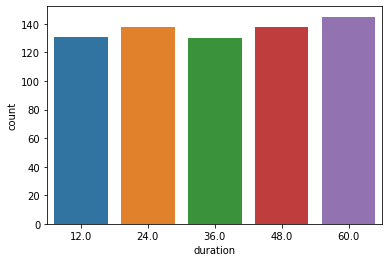

In [64]:
sns.countplot(x='duration', data=final)

If we look at the duration mix of loans, we can see that our loans are not skewed towards any duration. If the bank requires more liquidity, they can consider issuing less of long term loans. The business team can also identify the profitability of each duration segment to assess if they should change the mix of the loans.

<AxesSubplot:xlabel='status', ylabel='count'>

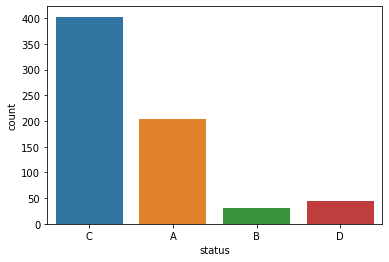

In [65]:
sns.countplot(x='status', data=final)

The loans that have been issued have been classified as follows:
<br/>
1. A: Contract finished, no issues
2. B: Contract finished, loans no paid
3. C: Running contract, no issues
4. D: Running contract, client in debt
<br/>

Majority of our loans are in the 'A' and 'C' category which represents healthy loans. The risk department can assess if this is a appropriate non-performing loan balance that the bank is willing to tolerate.

Text(0, 0.5, 'Bank balance during loan')

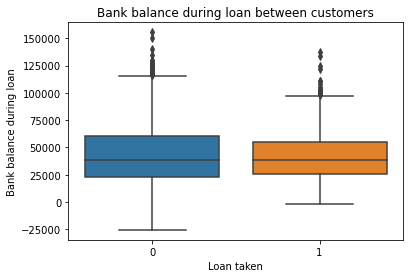

In [66]:
ax = sns.boxplot(x='loan_taken', y='bank_balance_at_loan2', data=final)
plt.title('Bank balance during loan between customers')
plt.xlabel('Loan taken')
plt.ylabel('Bank balance during loan')

From the boxplot, we can infer that customers that have taken a loan with us generally have a lower bank balance. The top customers are hence unlikely to take up our loans. Also there are customers with a negative bank balance in the 0 category. This means that an overdraft does not constitute a loan in our analysis.

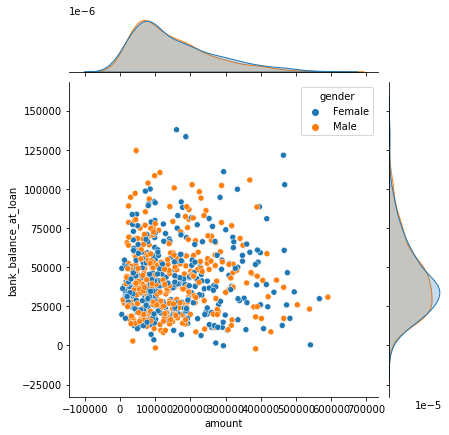

In [67]:
sns.jointplot(x='amount',y='bank_balance_at_loan',data=final, hue='gender')

From the scatterplot chart, we can see that there is no correlation between bank balance and loan amount taken up. The genders are also not concentrated in any area of the chart which shows that there is no meaningful relationship between gender, loan taken up and bank balance as loan.

Text(0.5, 0, 'loan amount')

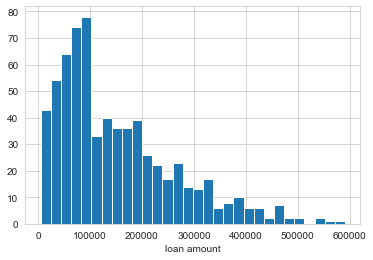

In [68]:
sns.set_style('whitegrid')
final['amount'].hist(bins=30)
plt.xlabel('loan amount')

The histogram shows that our loans issued are generally around Czech Koruna 100,000.

Text(0.5, 0, 'age')

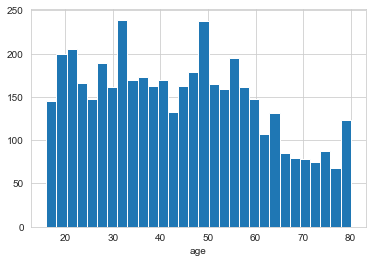

In [69]:
sns.set_style('whitegrid')
final['age'].hist(bins=30)
plt.xlabel('age')

Based on the histogram of age, there is no specified target age group for our customers

# 10. Exporting Final Dataset
We will export the final dataset to be used in the prediction model. We will therefore not have to go through the entire data transformation process before we begin the building the prediction model. The final dataset can also be an input to other prediction softwares such as jmp, Dataiku and Alteryx.

In [70]:
final.to_csv('final.csv', index=False)